# FOOTBALL MANAGER DATASET

# Índice
1. [XXX](#XXX)

Descripcion

In [4]:
import pandas as pd
import numpy as np

In [5]:
ruta_jugadores = 'data/FM 2023.csv'
df_jugadores = pd.read_csv(ruta_jugadores,low_memory = False)
df_jugadores.head(5)

,Name,Position,Age,ca,pa,Nationality,Club,Corners,Crossing,Dribbling,...,World reputation,Race,RCA,Colour of skin,Date of birth,Number of national team appearances,Goals scored for the national team,Salary,Rental club,UID
0,Kevin De Bruyne,M/AM RLC,31,189,189,Belgium,Manchester City,14,19,15,...,9400,Northern_European,181,4,1991/6/28,91,24,394372.0,NaN,18004457
1,Kylian Mbappé,AM/S RL,23,188,197,France,Paris Saint-Germain,13,13,18,...,9248,African_Caribbean,172,13,1998/12/20,57,27,1035616.0,NaN,85139014
2,Robert Lewandowski,S,33,186,190,Poland,Barcelona,3,8,13,...,9250,Northern_European,183,3,1988/8/21,132,76,345204.0,NaN,719601
3,Erling Haaland,S,22,185,195,"Norway,England",Manchester City,7,10,14,...,8750,Northern_European,185,2,2000/7/21,21,20,394372.0,NaN,29179241
4,Mohamed Salah,AM/S RL,30,185,187,Egypt,Liverpool,12,14,17,...,8750,North_African__Middle_Eastern,181,9,1992/6/15,85,47,405971.0,NaN,98028755


In [6]:
df_jugadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8452 entries, 0 to 8451
Data columns (total 98 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 8452 non-null   object 
 1   Position                             8452 non-null   object 
 2   Age                                  8452 non-null   int64  
 3   ca                                   8452 non-null   int64  
 4   pa                                   8452 non-null   int64  
 5   Nationality                          8452 non-null   object 
 6   Club                                 8345 non-null   object 
 7   Corners                              8452 non-null   int64  
 8   Crossing                             8452 non-null   int64  
 9   Dribbling                            8452 non-null   int64  
 10  Finishing                            8452 non-null   int64  
 11  First Touch                   

In [7]:
print(f'En el dataset hay: {len(pd.unique(df_jugadores["Name"]))} jugadores, correspondiente a {len(pd.unique(df_jugadores["Club"]))} clubes.')

En el dataset hay: 8452 jugadores, correspondiente a 919 clubes.


In [8]:
df_jugadores_filtrado = df_jugadores.copy()

### Calidad de los datos

In [9]:
df_jugadores_filtrado.isnull().sum()

Name                                      0
Position                                  0
Age                                       0
ca                                        0
pa                                        0
                                       ... 
Number of national team appearances       0
Goals scored for the national team        0
Salary                                  107
Rental club                            7457
UID                                       0
Length: 98, dtype: int64

In [10]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Valores Faltantes', 1: '% de Valores Totales'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% de Valores Totales', ascending=False).round(1)
    print("El dataframe tiene " + str(df.shape[1]) + " columnas.\n"
                                                     "Hay " + str(mis_val_table_ren_columns.shape[0]) +
          " columnas que les faltan valores.")
    return mis_val_table_ren_columns
missing_values_table(df_jugadores_filtrado)

El dataframe tiene 98 columnas.
Hay 3 columnas que les faltan valores.


,Valores Faltantes,% de Valores Totales
Rental club,7457,88.2
Club,107,1.3
Salary,107,1.3


In [11]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df_jugadores_filtrado);
missing_columns = list(missing_df[missing_df['% de Valores Totales'] > 50].index)
print('Se eliminan %d columnas.' % len(missing_columns))
print(f'Son: {missing_columns}')

El dataframe tiene 98 columnas.
Hay 3 columnas que les faltan valores.
Se eliminan 1 columnas.
Son: ['Rental club']


In [12]:
# Drop the columns
df_jugadores_filtrado = df_jugadores_filtrado.drop(list(missing_columns), axis=1)

In [13]:
df_jugadores_filtrado

,Name,Position,Age,ca,pa,Nationality,Club,Corners,Crossing,Dribbling,...,Domestic reputation,World reputation,Race,RCA,Colour of skin,Date of birth,Number of national team appearances,Goals scored for the national team,Salary,UID
0,Kevin De Bruyne,M/AM RLC,31,189,189,Belgium,Manchester City,14,19,15,...,9400,9400,Northern_European,181,4,1991/6/28,91,24,394372.0,18004457
1,Kylian Mbappé,AM/S RL,23,188,197,France,Paris Saint-Germain,13,13,18,...,9398,9248,African_Caribbean,172,13,1998/12/20,57,27,1035616.0,85139014
2,Robert Lewandowski,S,33,186,190,Poland,Barcelona,3,8,13,...,9400,9250,Northern_European,183,3,1988/8/21,132,76,345204.0,719601
3,Erling Haaland,S,22,185,195,"Norway,England",Manchester City,7,10,14,...,9250,8750,Northern_European,185,2,2000/7/21,21,20,394372.0,29179241
4,Mohamed Salah,AM/S RL,30,185,187,Egypt,Liverpool,12,14,17,...,9445,8750,North_African__Middle_Eastern,181,9,1992/6/15,85,47,405971.0,98028755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,Joe Ashton,D L,16,45,135,England,Burnley,3,4,5,...,2270,236,Northern_European,41,3,2006/6/26,0,0,203.0,2000210572
8448,River Ries,S,17,45,135,Germany,Karlsruher SC,2,2,11,...,2348,462,Northern_European,33,255,2005/4/3,0,0,402.0,2000197059
8449,Halilcan Doğan,D C,23,45,-75,Turkey,Osmaniyespor Futbol Kulübü,1,1,1,...,3055,1145,Northern_European,41,3,1999/2/11,0,0,82.0,2000047739
8450,Adijat Sefer,S,17,45,135,Germany,TSG Hoffenheim,3,4,12,...,2350,474,Northern_European,40,255,2005/1/20,0,0,646.0,2000197383


In [14]:
df_jugadores_filtrado = df_jugadores_filtrado.drop(['GK', 'DL', 'DC', 'DR', 'WBL', 'WBR', 'DM', 'ML', 'MC', 'MR', 'AML', 'AMC','AMR', 'ST', 'Height', 'Weight', 'Race', 'Colour of skin', 'Date of birth', 'UID', 'Position.1', 'RCA'], axis=1)
df_jugadores_filtrado

,Name,Position,Age,ca,pa,Nationality,Club,Corners,Crossing,Dribbling,...,Emotional control,Left Foot,Right Foot,Values,Current reputation,Domestic reputation,World reputation,Number of national team appearances,Goals scored for the national team,Salary
0,Kevin De Bruyne,M/AM RLC,31,189,189,Belgium,Manchester City,14,19,15,...,13,16,20,347975206,9450,9400,9400,91,24,394372.0
1,Kylian Mbappé,AM/S RL,23,188,197,France,Paris Saint-Germain,13,13,18,...,13,10,20,347975206,9398,9398,9248,57,27,1035616.0
2,Robert Lewandowski,S,33,186,190,Poland,Barcelona,3,8,13,...,11,13,20,347975206,9300,9400,9250,132,76,345204.0
3,Erling Haaland,S,22,185,195,"Norway,England",Manchester City,7,10,14,...,12,20,11,347975206,9250,9250,8750,21,20,394372.0
4,Mohamed Salah,AM/S RL,30,185,187,Egypt,Liverpool,12,14,17,...,17,20,8,347975206,9400,9445,8750,85,47,405971.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,Joe Ashton,D L,16,45,135,England,Burnley,3,4,5,...,20,20,7,124343,2120,2270,236,0,0,203.0
8448,River Ries,S,17,45,135,Germany,Karlsruher SC,2,2,11,...,19,8,20,42749,2248,2348,462,0,0,402.0
8449,Halilcan Doğan,D C,23,45,-75,Turkey,Osmaniyespor Futbol Kulübü,1,1,1,...,10,8,20,5199,3200,3055,1145,0,0,82.0
8450,Adijat Sefer,S,17,45,135,Germany,TSG Hoffenheim,3,4,12,...,20,7,20,70999,2000,2350,474,0,0,646.0


In [15]:
df_jugadores_filtrado = df_jugadores_filtrado.rename(columns={
    'Name': 'Nombre',
    'Position': 'Posicion',
    'Age': 'Edad',
    'ca': 'Habilidad_Actual',
    'pa': 'Habilidad_Potencial',
    'Nationality': 'Nacionalidad',
    'Club': 'Club',
    'Corners': 'Corners',
    'Crossing': 'Centros',
    'Dribbling': 'Regate',
    'Finishing': 'Finalización',
    'First Touch': 'Primer_Toque',
    'Free Kick Taking': 'Tiro_Libre',
    'Heading': 'Cabeceo',
    'Long Shots': 'Tiros_Largos',
    'Long Throws': 'Lanzamientos_Largos',
    'Marking': 'Marcado',
    'Passing': 'Pases',
    'Penalty Taking': 'Penales',
    'Tackling': 'Entradas',
    'Technique': 'Técnica',
    'Aggressiion': 'Agresividad',
    'Anticipation': 'Anticipación',
    'Bravery': 'Valentía',
    'Composure': 'Compostura',
    'Concentration': 'Concentración',
    'Vision': 'Visión',
    'Decision': 'Decisión',
    'Determination': 'Determinación',
    'Flair': 'Talento',
    'Leadership': 'Liderazgo',
    'Off The Ball': 'Sin_balon',
    'Teamwork': 'Trabajo_en_Equipo',
    'Work Rate': 'Ritmo_de_Trabajo',
    'Acceleration': 'Aceleración',
    'Agility': 'Agilidad',
    'Balance': 'Equilibrio',
    'Jumping Reach': 'Salto',
    'Natural Fitness': 'Condición_Física',
    'Pace': 'Ritmo',
    'Stamina': 'Resistencia',
    'Strength': 'Fuerza',
    'Stability': 'Estabilidad',
    'Foul': 'Falta',
    'Contest performance': 'Rendimiento_con_Competencia',
    'Injury': 'Lesión',
    'diversity': 'Diversidad',
    'Aerial Reach': 'Alcance_Aéreo',
    'Command Of Area': 'Dominio_del_Área',
    'Communication': 'Comunicación',
    'Eccentricity': 'Excentricidad',
    'Handling': 'Manejo',
    'Kicking': 'Patada',
    'One On Ones': 'Uno_Contra_Uno',
    'Reflexes': 'Reflejos',
    'Rushing Out': 'Salir_Rápido',
    'Punching': 'Golpeo',
    'Throwing': 'Lanzamiento',
    'Adaptation': 'Adaptación',
    'Ambition': 'Ambición',
    'Argue': 'Discutir',
    'Loyal': 'Lealtad',
    'Resistant to stress': 'Resistencia_al_Estrés',
    'Professional': 'Profesional',
    'Sportsmanship': 'Deportividad',
    'Emotional control': 'Control_Emocional',
    'Left Foot': 'Pie_Izquierdo',
    'Right Foot': 'Pie_Derecho',
     'Values': 'Valores',
    'Current reputation': 'Reputación_actual',
    'Domestic reputation': 'Reputación_doméstica',
    'World reputation': 'Reputación_mundial',
    'Number of national team appearances': 'Número_de_apariciones_en_equipo_nacional',
    'Goals scored for the national team': 'Goles_marcados_para_el_equipo_nacional',
    'Salary': 'Salario'
})

In [16]:
df_jugadores_filtrado

,Nombre,Posicion,Edad,Habilidad_Actual,Habilidad_Potencial,Nacionalidad,Club,Corners,Centros,Regate,...,Control_Emocional,Pie_Izquierdo,Pie_Derecho,Valores,Reputación_actual,Reputación_doméstica,Reputación_mundial,Número_de_apariciones_en_equipo_nacional,Goles_marcados_para_el_equipo_nacional,Salario
0,Kevin De Bruyne,M/AM RLC,31,189,189,Belgium,Manchester City,14,19,15,...,13,16,20,347975206,9450,9400,9400,91,24,394372.0
1,Kylian Mbappé,AM/S RL,23,188,197,France,Paris Saint-Germain,13,13,18,...,13,10,20,347975206,9398,9398,9248,57,27,1035616.0
2,Robert Lewandowski,S,33,186,190,Poland,Barcelona,3,8,13,...,11,13,20,347975206,9300,9400,9250,132,76,345204.0
3,Erling Haaland,S,22,185,195,"Norway,England",Manchester City,7,10,14,...,12,20,11,347975206,9250,9250,8750,21,20,394372.0
4,Mohamed Salah,AM/S RL,30,185,187,Egypt,Liverpool,12,14,17,...,17,20,8,347975206,9400,9445,8750,85,47,405971.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,Joe Ashton,D L,16,45,135,England,Burnley,3,4,5,...,20,20,7,124343,2120,2270,236,0,0,203.0
8448,River Ries,S,17,45,135,Germany,Karlsruher SC,2,2,11,...,19,8,20,42749,2248,2348,462,0,0,402.0
8449,Halilcan Doğan,D C,23,45,-75,Turkey,Osmaniyespor Futbol Kulübü,1,1,1,...,10,8,20,5199,3200,3055,1145,0,0,82.0
8450,Adijat Sefer,S,17,45,135,Germany,TSG Hoffenheim,3,4,12,...,20,7,20,70999,2000,2350,474,0,0,646.0


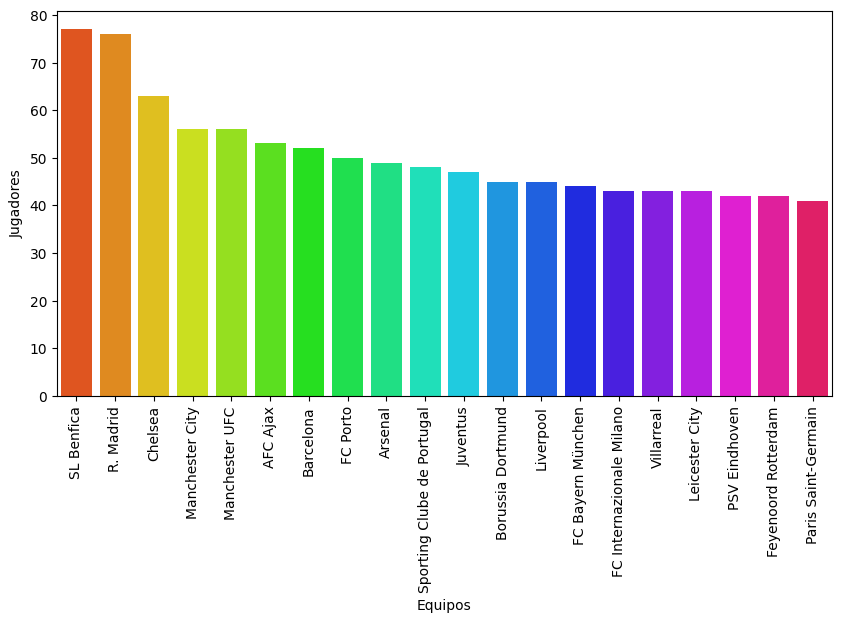

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Primero, obtén los 20 equipos con más jugadores
top_20_clubs = df_jugadores_filtrado['Club'].value_counts().nlargest(20).index

# Filtra el DataFrame para incluir solo jugadores de estos equipos
df_top_20_clubs = df_jugadores_filtrado[df_jugadores_filtrado['Club'].isin(top_20_clubs)]

plt.figure(figsize=(10,5))
chart = sns.countplot(x='Club', data=df_top_20_clubs, palette='hsv', order = df_top_20_clubs['Club'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

# Establece los nombres de los ejes
chart.set_xlabel('Equipos')
chart.set_ylabel('Jugadores')

plt.savefig('resources/distribucion_jugadores_por_top_20_clubs.png', bbox_inches='tight')

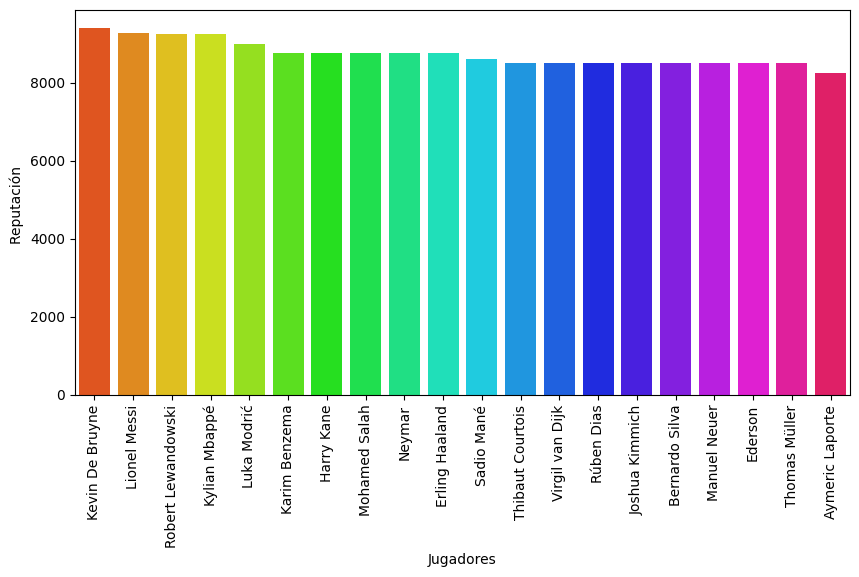

In [18]:
# Ordena el DataFrame por "Reputación Mundial" en orden descendente y toma las primeras 20 filas
top_20_jugadores = df_jugadores_filtrado.sort_values('Reputación_mundial', ascending=False).head(20)

plt.figure(figsize=(10,5))
chart = sns.barplot(x='Nombre', y='Reputación_mundial', data=top_20_jugadores, palette='hsv')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

# Establece los nombres de los ejes
chart.set_xlabel('Jugadores')
chart.set_ylabel('Reputación ')

plt.savefig('resources/reputacion_mundial_top_20_jugadores.png', bbox_inches='tight')

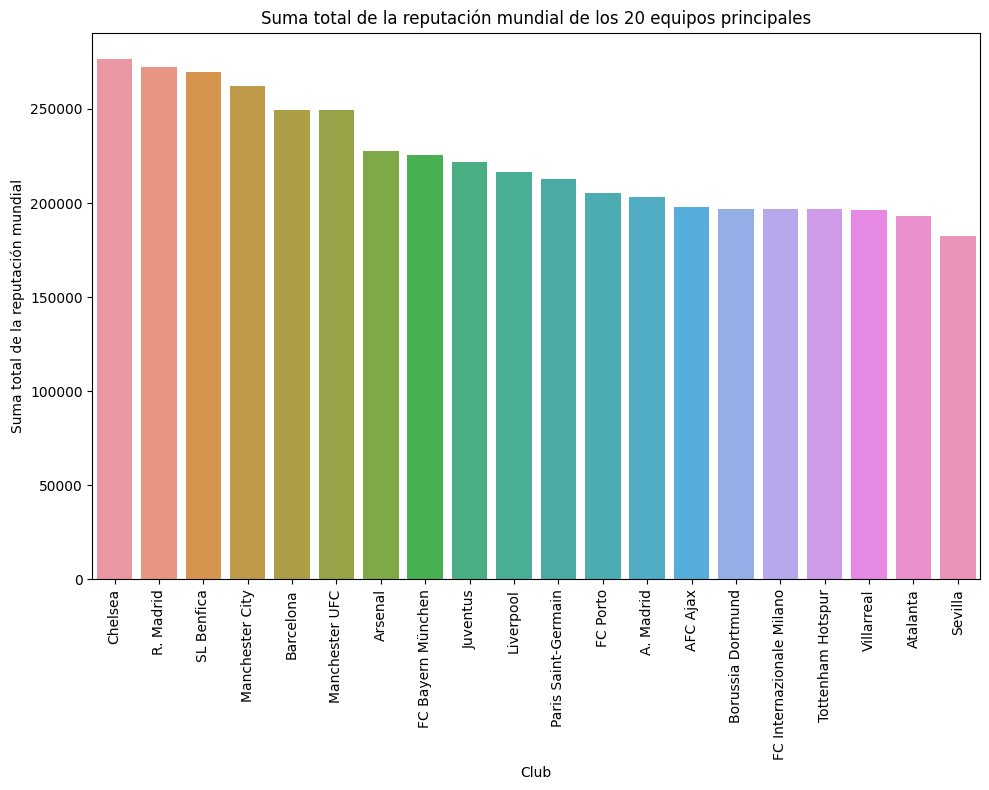

In [19]:
# Agrupa el DataFrame por 'Equipo' y suma 'Reputación_mundial'
df_suma_reputacion = df_jugadores_filtrado.groupby('Club')['Reputación_mundial'].sum()

# Ordena el DataFrame de mayor a menor por 'Reputación_mundial'
df_suma_reputacion_ordenada = df_suma_reputacion.sort_values(ascending=False)

# Selecciona los primeros 20 equipos
top_20_equipos_reputacion = df_suma_reputacion_ordenada.head(20)

# Crea el gráfico
plt.figure(figsize=(10,8))
ax = sns.barplot(x=top_20_equipos_reputacion.index, y=top_20_equipos_reputacion.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Suma total de la reputación mundial de los 20 equipos principales')
plt.ylabel('Suma total de la reputación mundial')
plt.tight_layout()
plt.savefig('resources/top_20_equipos_reputacion.png')
plt.show()

In [20]:
hay_duplicados = df_jugadores_filtrado.duplicated().any()
print(hay_duplicados)

False


In [21]:
# Calcular el número de valores únicos en cada columna
unicos_por_columna = df_jugadores_filtrado.nunique()

# Ordenar los resultados de mayor a menor
unicos_por_columna_ordenados = unicos_por_columna.sort_values(ascending=True)

# Imprimir los resultados
print(unicos_por_columna_ordenados)

Decisión                  15
Agilidad                  16
Dominio_del_Área          17
Manejo                    17
Reflejos                  17
                        ... 
Reputación_doméstica    2143
Reputación_mundial      2592
Salario                 3636
Valores                 6861
Nombre                  8452
Length: 75, dtype: int64


In [23]:
df_jugadores_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8452 entries, 0 to 8451
Data columns (total 75 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Nombre                                    8452 non-null   object 
 1   Posicion                                  8452 non-null   object 
 2   Edad                                      8452 non-null   int64  
 3   Habilidad_Actual                          8452 non-null   int64  
 4   Habilidad_Potencial                       8452 non-null   int64  
 5   Nacionalidad                              8452 non-null   object 
 6   Club                                      8345 non-null   object 
 7   Corners                                   8452 non-null   int64  
 8   Centros                                   8452 non-null   int64  
 9   Regate                                    8452 non-null   int64  
 10  Finalización                        

In [24]:
df_encoded = df_jugadores_filtrado.copy()
df_encoded

,Nombre,Posicion,Edad,Habilidad_Actual,Habilidad_Potencial,Nacionalidad,Club,Corners,Centros,Regate,...,Control_Emocional,Pie_Izquierdo,Pie_Derecho,Valores,Reputación_actual,Reputación_doméstica,Reputación_mundial,Número_de_apariciones_en_equipo_nacional,Goles_marcados_para_el_equipo_nacional,Salario
0,Kevin De Bruyne,M/AM RLC,31,189,189,Belgium,Manchester City,14,19,15,...,13,16,20,347975206,9450,9400,9400,91,24,394372.0
1,Kylian Mbappé,AM/S RL,23,188,197,France,Paris Saint-Germain,13,13,18,...,13,10,20,347975206,9398,9398,9248,57,27,1035616.0
2,Robert Lewandowski,S,33,186,190,Poland,Barcelona,3,8,13,...,11,13,20,347975206,9300,9400,9250,132,76,345204.0
3,Erling Haaland,S,22,185,195,"Norway,England",Manchester City,7,10,14,...,12,20,11,347975206,9250,9250,8750,21,20,394372.0
4,Mohamed Salah,AM/S RL,30,185,187,Egypt,Liverpool,12,14,17,...,17,20,8,347975206,9400,9445,8750,85,47,405971.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,Joe Ashton,D L,16,45,135,England,Burnley,3,4,5,...,20,20,7,124343,2120,2270,236,0,0,203.0
8448,River Ries,S,17,45,135,Germany,Karlsruher SC,2,2,11,...,19,8,20,42749,2248,2348,462,0,0,402.0
8449,Halilcan Doğan,D C,23,45,-75,Turkey,Osmaniyespor Futbol Kulübü,1,1,1,...,10,8,20,5199,3200,3055,1145,0,0,82.0
8450,Adijat Sefer,S,17,45,135,Germany,TSG Hoffenheim,3,4,12,...,20,7,20,70999,2000,2350,474,0,0,646.0


In [25]:
eliminar = ['Nombre', 'Posicion', 'Nacionalidad', 'Club']
df_encoded = df_encoded.drop(columns=eliminar,  axis=1)
df_encoded

,Edad,Habilidad_Actual,Habilidad_Potencial,Corners,Centros,Regate,Finalización,Primer_Toque,Tiro_Libre,Cabeceo,...,Control_Emocional,Pie_Izquierdo,Pie_Derecho,Valores,Reputación_actual,Reputación_doméstica,Reputación_mundial,Número_de_apariciones_en_equipo_nacional,Goles_marcados_para_el_equipo_nacional,Salario
0,31,189,189,14,19,15,16,16,17,6,...,13,16,20,347975206,9450,9400,9400,91,24,394372.0
1,23,188,197,13,13,18,17,18,12,7,...,13,10,20,347975206,9398,9398,9248,57,27,1035616.0
2,33,186,190,3,8,13,19,18,15,17,...,11,13,20,347975206,9300,9400,9250,132,76,345204.0
3,22,185,195,7,10,14,18,16,13,15,...,12,20,11,347975206,9250,9250,8750,21,20,394372.0
4,30,185,187,12,14,17,17,17,12,10,...,17,20,8,347975206,9400,9445,8750,85,47,405971.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,16,45,135,3,4,5,4,4,1,6,...,20,20,7,124343,2120,2270,236,0,0,203.0
8448,17,45,135,2,2,11,11,11,2,6,...,19,8,20,42749,2248,2348,462,0,0,402.0
8449,23,45,-75,1,1,1,2,4,1,12,...,10,8,20,5199,3200,3055,1145,0,0,82.0
8450,17,45,135,3,4,12,7,8,3,12,...,20,7,20,70999,2000,2350,474,0,0,646.0


In [26]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8452 entries, 0 to 8451
Data columns (total 71 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Edad                                      8452 non-null   int64  
 1   Habilidad_Actual                          8452 non-null   int64  
 2   Habilidad_Potencial                       8452 non-null   int64  
 3   Corners                                   8452 non-null   int64  
 4   Centros                                   8452 non-null   int64  
 5   Regate                                    8452 non-null   int64  
 6   Finalización                              8452 non-null   int64  
 7   Primer_Toque                              8452 non-null   int64  
 8   Tiro_Libre                                8452 non-null   int64  
 9   Cabeceo                                   8452 non-null   int64  
 10  Tiros_Largos                        

In [27]:
# Verificando datos faltantes
print("Datos faltantes:")
print(df_encoded.isnull().sum())

# Verificando duplicados
print("Duplicados:")
print(df_encoded.duplicated().sum())

# Identificando outliers
# Aquí usamos el método del rango intercuartil (IQR) para identificar outliers
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1

#print("Outliers:")
#print(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())

Datos faltantes:
Edad                                          0
Habilidad_Actual                              0
Habilidad_Potencial                           0
Corners                                       0
Centros                                       0
                                           ... 
Reputación_doméstica                          0
Reputación_mundial                            0
Número_de_apariciones_en_equipo_nacional      0
Goles_marcados_para_el_equipo_nacional        0
Salario                                     107
Length: 71, dtype: int64
Duplicados:
0


In [28]:
df_encoded['Salario'] = df_encoded['Salario'].fillna(df_encoded['Salario'].median())
df_encoded

,Edad,Habilidad_Actual,Habilidad_Potencial,Corners,Centros,Regate,Finalización,Primer_Toque,Tiro_Libre,Cabeceo,...,Control_Emocional,Pie_Izquierdo,Pie_Derecho,Valores,Reputación_actual,Reputación_doméstica,Reputación_mundial,Número_de_apariciones_en_equipo_nacional,Goles_marcados_para_el_equipo_nacional,Salario
0,31,189,189,14,19,15,16,16,17,6,...,13,16,20,347975206,9450,9400,9400,91,24,394372.0
1,23,188,197,13,13,18,17,18,12,7,...,13,10,20,347975206,9398,9398,9248,57,27,1035616.0
2,33,186,190,3,8,13,19,18,15,17,...,11,13,20,347975206,9300,9400,9250,132,76,345204.0
3,22,185,195,7,10,14,18,16,13,15,...,12,20,11,347975206,9250,9250,8750,21,20,394372.0
4,30,185,187,12,14,17,17,17,12,10,...,17,20,8,347975206,9400,9445,8750,85,47,405971.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8447,16,45,135,3,4,5,4,4,1,6,...,20,20,7,124343,2120,2270,236,0,0,203.0
8448,17,45,135,2,2,11,11,11,2,6,...,19,8,20,42749,2248,2348,462,0,0,402.0
8449,23,45,-75,1,1,1,2,4,1,12,...,10,8,20,5199,3200,3055,1145,0,0,82.0
8450,17,45,135,3,4,12,7,8,3,12,...,20,7,20,70999,2000,2350,474,0,0,646.0


In [29]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8452 entries, 0 to 8451
Data columns (total 71 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Edad                                      8452 non-null   int64  
 1   Habilidad_Actual                          8452 non-null   int64  
 2   Habilidad_Potencial                       8452 non-null   int64  
 3   Corners                                   8452 non-null   int64  
 4   Centros                                   8452 non-null   int64  
 5   Regate                                    8452 non-null   int64  
 6   Finalización                              8452 non-null   int64  
 7   Primer_Toque                              8452 non-null   int64  
 8   Tiro_Libre                                8452 non-null   int64  
 9   Cabeceo                                   8452 non-null   int64  
 10  Tiros_Largos                        

In [47]:
print(len(df_encoded))

8452


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from joblib import dump
import pandas as pd
import numpy as np

# DataFrame actualizado con la columna objetivo ponderada 'Total_Habilidad'
df_encoded['Total_Habilidad'] = 0.6 * df_encoded['Habilidad_Actual'] + 0.4 * df_encoded['Habilidad_Potencial']

# Asumo que tus características (X) están en el DataFrame df y la columna objetivo (y) es 'Total_Habilidad'
X = df_encoded.drop(['Total_Habilidad'], axis=1)
y = df_encoded['Total_Habilidad']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelos = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(),
        'params': {'max_depth': [4, 8, 12]}
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators': [100, 200, 300],
                   'max_depth': [4, 8, 12]}
    },
    'KNN': {
        'model': KNeighborsRegressor(),
        'params': {'n_neighbors': [3, 5, 7, 9]}
    },
    'NeuralNetwork': {
        'model': MLPRegressor(max_iter=2000),
        'params': {'hidden_layer_sizes': [(50, 50, 50), (100,)],
                   'activation': ['tanh', 'relu'],
                   'solver': ['adam'],
                   'alpha': [0.0001, 0.01],
                   'learning_rate': ['constant']}
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    },
    'XGBoost': {
        'model': XGBRegressor(eval_metric='rmse'),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    }
}

mejor_score = 0.0
mejor_modelo = None
resultados_modelos = []

for nombre_modelo, mp in modelos.items():
    reg = GridSearchCV(mp['model'], mp['params'], cv=5)
    reg.fit(X_train, y_train)

    resultado_modelo = {
        'Modelo': nombre_modelo,
        'Mejor Score': reg.best_score_,
        'Mejores Parámetros': reg.best_params_
    }

    resultados_modelos.append(resultado_modelo)

    if reg.best_score_ > mejor_score:
        mejor_score = reg.best_score_
        mejor_modelo = reg

df_resultados = pd.DataFrame(resultados_modelos)

print(df_resultados)
print(f"\nEl mejor modelo es: {mejor_modelo.best_estimator_} con un score de: {mejor_score}")

# Guardar el mejor modelo
dump(mejor_modelo, 'mejor_modelo.joblib')

             Modelo  Mejor Score  \
0  LinearRegression     1.000000   
1      DecisionTree     0.999635   
2      RandomForest     0.999802   
3               SVR    -0.161942   
4               KNN     0.246745   
5     NeuralNetwork     0.000819   
6  GradientBoosting     0.999868   
7           XGBoost     0.999892   

                                  Mejores Parámetros  
0                                                 {}  
1                                  {'max_depth': 12}  
2             {'max_depth': 12, 'n_estimators': 300}  
3                            {'C': 10, 'gamma': 0.1}  
4                                 {'n_neighbors': 3}  
5  {'activation': 'tanh', 'alpha': 0.01, 'hidden_...  
6        {'learning_rate': 0.1, 'n_estimators': 200}  
7        {'learning_rate': 0.1, 'n_estimators': 200}  

El mejor modelo es: LinearRegression() con un score de: 1.0
MSE: 4.83801031650012e-16
RMSE: 2.199547752721027e-08
R^2: 1.0
             Modelo  Mejor Score  \
0  LinearRegression 

['mejor_modelo.joblib']

In [32]:
# Obtener las predicciones del mejor modelo en el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)

# Calcular métricas de evaluación (MSE, RMSE, R^2)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

MSE: 4.83801031650012e-16
RMSE: 2.199547752721027e-08
R^2: 1.0


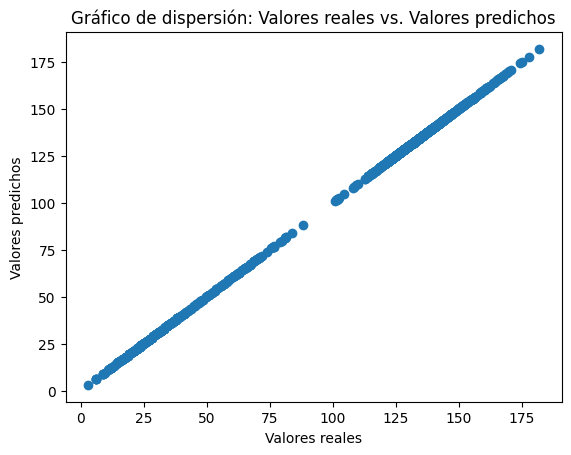

In [33]:
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Gráfico de dispersión: Valores reales vs. Valores predichos')
plt.show()

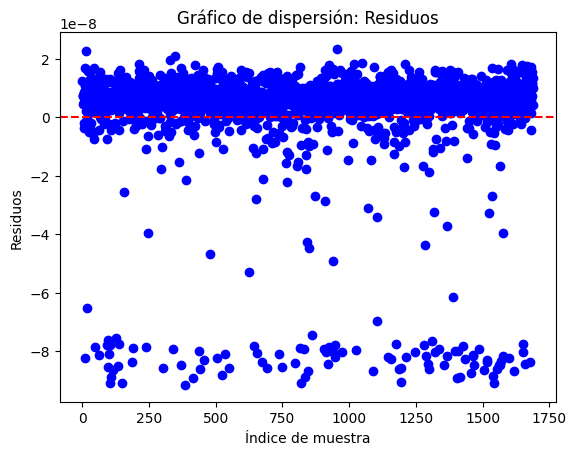

In [34]:
residuos = y_test - y_pred

plt.scatter(range(len(residuos)), residuos, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Línea horizontal en y=0

plt.xlabel('Índice de muestra')
plt.ylabel('Residuos')
plt.title('Gráfico de dispersión: Residuos')

plt.show()

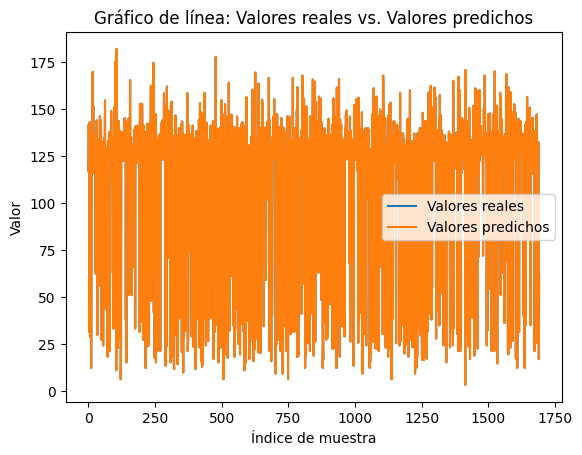

In [35]:
plt.plot(range(len(y_test)), y_test, label='Valores reales')
plt.plot(range(len(y_pred)), y_pred, label='Valores predichos')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor')
plt.title('Gráfico de línea: Valores reales vs. Valores predichos')
plt.legend()
plt.show()

In [37]:
# Realiza la predicción del valor Total_Habilidad
valores_predichos = mejor_modelo.predict(df_jugadores_filtrado)

# Crea un DataFrame con los valores predichos y otras columnas de interés
df_predicciones = pd.DataFrame(valores_predichos, columns=['Total_Habilidad'])
df_predicciones['Nombre'] = df_jugadores_filtrado['Nombre']
df_predicciones['Posicion'] = df_jugadores_filtrado['Posicion']
df_predicciones['Nacionalidad'] = df_jugadores_filtrado['Nacionalidad']
df_predicciones['Club'] = df_jugadores_filtrado['Club']

# Ordena el DataFrame por el valor Total_Habilidad en orden descendente
df_predicciones.sort_values('Total_Habilidad', ascending=False, inplace=True)

# Muestra los jugadores con mayor Total_Habilidad
df_predicciones

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Club
- Nacionalidad
- Nombre
- Posicion


In [40]:
# Realiza la predicción del valor total_jugador
valores_predichos = mejor_modelo.predict(X)

# Crea un DataFrame con los valores predichos y otras columnas de interés
df_predicciones = pd.DataFrame(valores_predichos, columns=['total_jugador'])
df_predicciones['jugador_nombre'] = df_jugadores_filtrado['Nombre']
df_predicciones['equipo_nombre'] = df_jugadores_filtrado['Club']
df_predicciones['jugador_nacionalidad'] = df_jugadores_filtrado['Nacionalidad']

# Ordena el DataFrame por el valor total_jugador en orden descendente
df_predicciones.sort_values('total_jugador', ascending=False, inplace=True)

# Muestra los jugadores con mayor total_jugador
df_predicciones

,total_jugador,jugador_nombre,equipo_nombre,jugador_nacionalidad
1,1.916000e+02,Kylian Mbappé,Paris Saint-Germain,France
0,1.890000e+02,Kevin De Bruyne,Manchester City,Belgium
3,1.890000e+02,Erling Haaland,Manchester City,"Norway,England"
9,1.880000e+02,Lionel Messi,Paris Saint-Germain,"Argentina,Spain"
2,1.876000e+02,Robert Lewandowski,Barcelona,Poland
...,...,...,...,...
8434,1.200000e+00,Borja,R. Madrid,Spain
8436,6.000000e-01,Aimar1,R. Madrid,Spain
8439,-1.291703e-08,Roman Mokrovics,Sigma Olomouc,Czech Republic
8440,-1.502325e-08,Ştefan Moraru,Fotbal Club FCSB,Romania


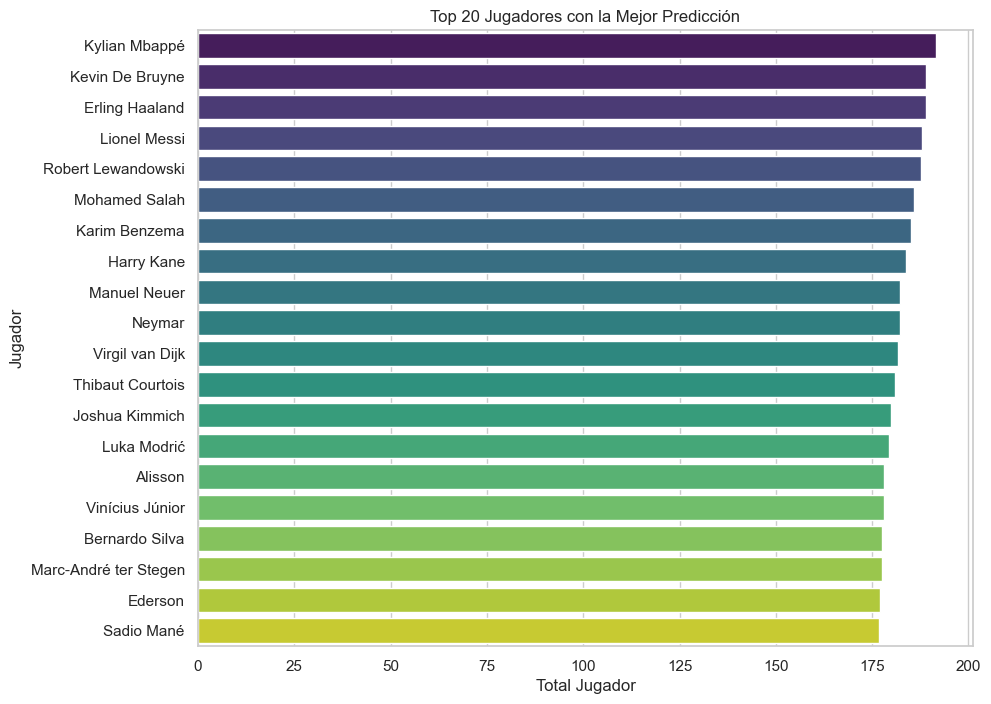

In [41]:
import seaborn as sns

# Obtén los 20 jugadores con la mejor predicción
top_jugadores = df_predicciones.head(20)

# Configura el estilo de Seaborn
sns.set(style='whitegrid')

# Crea el gráfico de barras horizontal
plt.figure(figsize=(10, 8))
sns.barplot(x='total_jugador', y='jugador_nombre', data=top_jugadores, palette='viridis')
plt.xlabel('Total Jugador')
plt.ylabel('Jugador')
plt.title('Top 20 Jugadores con la Mejor Predicción')
plt.show()

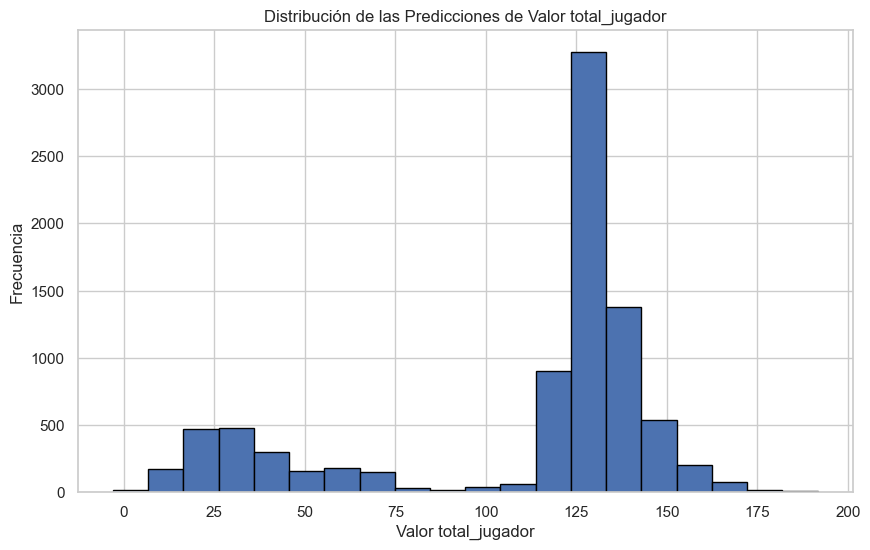

In [42]:
# Histograma de las predicciones de valor total_jugador
plt.figure(figsize=(10, 6))
plt.hist(df_predicciones['total_jugador'], bins=20, edgecolor='black')
plt.xlabel('Valor total_jugador')
plt.ylabel('Frecuencia')
plt.title('Distribución de las Predicciones de Valor total_jugador')
plt.show()

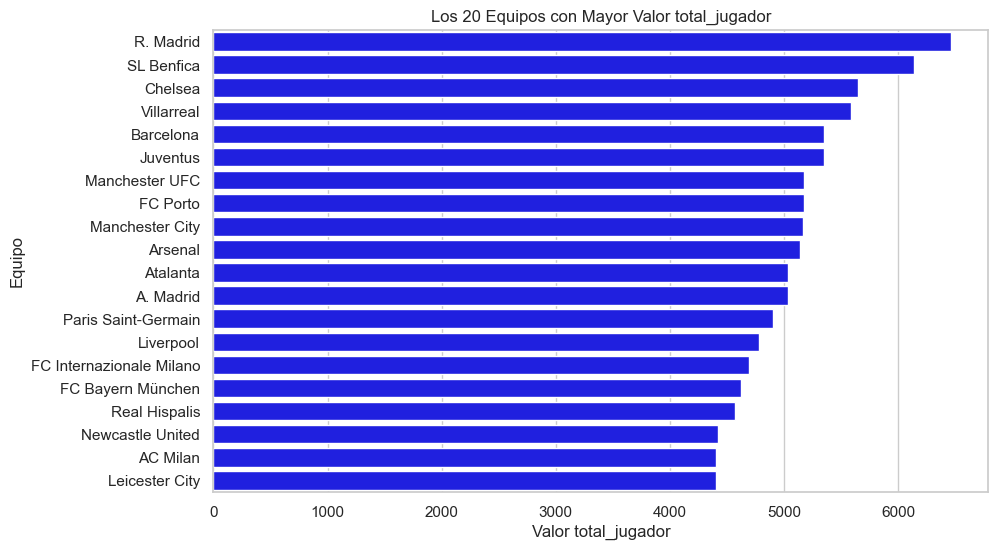

In [43]:
# Agrupa los datos por equipo_nombre y calcula la suma del valor total_jugador para cada equipo
df_equipos = df_predicciones.groupby('equipo_nombre')['total_jugador'].sum().reset_index()

# Ordena los equipos por el valor total_jugador en orden descendente
df_equipos = df_equipos.sort_values('total_jugador', ascending=False)

# Selecciona los 20 equipos con mayor valor total_jugador
top_20_equipos = df_equipos.head(20)

# Gráfico de barras de los 20 equipos con mayor valor total_jugador
plt.figure(figsize=(10, 6))
sns.barplot(x='total_jugador', y='equipo_nombre', data=top_20_equipos, color='blue')
plt.xlabel('Valor total_jugador')
plt.ylabel('Equipo')
plt.title('Los 20 Equipos con Mayor Valor total_jugador')
plt.show()

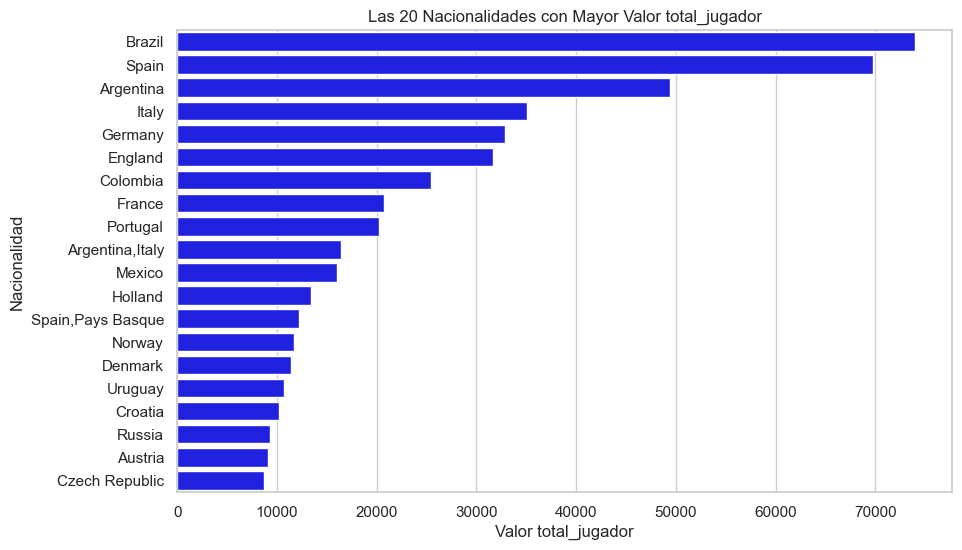

In [44]:
# Agrupa los datos por jugador_nacionalidad y calcula la suma del valor total_jugador para cada nacionalidad
df_nacionalidades = df_predicciones.groupby('jugador_nacionalidad')['total_jugador'].sum().reset_index()

# Ordena las nacionalidades por el valor total_jugador en orden descendente
df_nacionalidades = df_nacionalidades.sort_values('total_jugador', ascending=False)

# Selecciona las 20 nacionalidades con mayor valor total_jugador
top_20_nacionalidades = df_nacionalidades.head(20)

# Gráfico de barras de las 20 nacionalidades con mayor valor total_jugador
plt.figure(figsize=(10, 6))
sns.barplot(x='total_jugador', y='jugador_nacionalidad', data=top_20_nacionalidades, color='blue')
plt.xlabel('Valor total_jugador')
plt.ylabel('Nacionalidad')
plt.title('Las 20 Nacionalidades con Mayor Valor total_jugador')
plt.show()

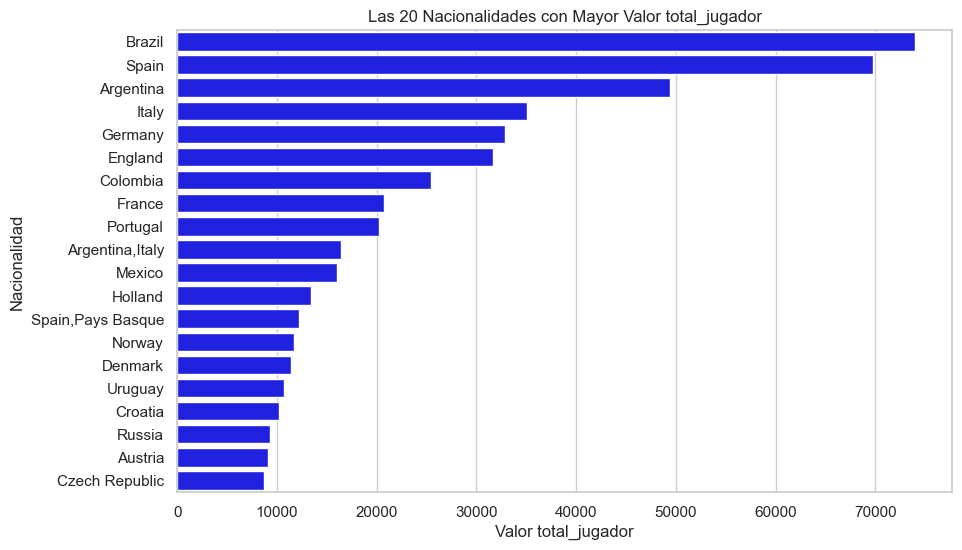

In [46]:
# Agrupa los datos por jugador_nacionalidad y calcula la suma del valor total_jugador para cada nacionalidad
df_nacionalidades = df_predicciones.groupby('jugador_nacionalidad')['total_jugador'].sum().reset_index()

# Ordena las nacionalidades por el valor total_jugador en orden descendente
df_nacionalidades = df_nacionalidades.sort_values('total_jugador', ascending=False)

# Selecciona las 20 nacionalidades con mayor valor total_jugador
top_20_nacionalidades = df_nacionalidades.head(20)

# Gráfico de barras de las 20 nacionalidades con mayor valor total_jugador
plt.figure(figsize=(10, 6))
sns.barplot(x='total_jugador', y='jugador_nacionalidad', data=top_20_nacionalidades, color='blue')
plt.xlabel('Valor total_jugador')
plt.ylabel('Nacionalidad')
plt.title('Las 20 Nacionalidades con Mayor Valor total_jugador')
plt.show()